In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#import dc_stat_think as dcst
import seaborn as sns
import statsmodels
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import laplace
import arch

In [4]:
sns.set()

# Uwaga zadanie 2

ceny aluminium z ostatniego projektu

Text(0, 0.5, 'Cena aluminium [USD]')

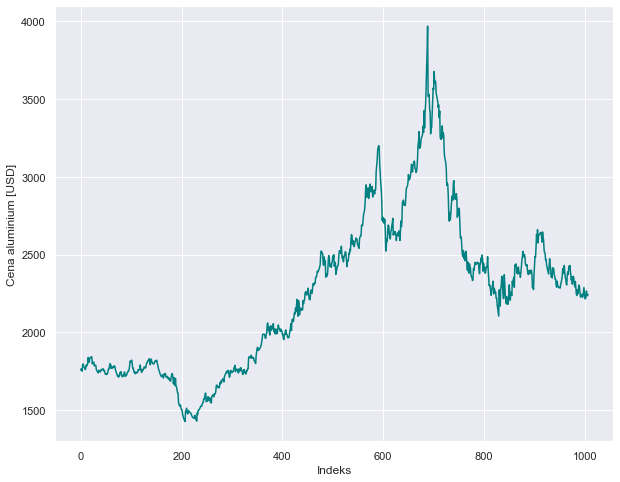

In [132]:
data = pd.read_csv("Al.csv").Open
plt.figure(figsize=(10,8))
data = [float(d.replace(",","")) for d in data][::-1]
data = data[:-3]
plt.plot(data, color = "teal")
plt.xlabel("Indeks")
plt.ylabel("Cena aluminium [USD]")
#print(data)

(-30.203795605341547,
 0.0,
 0,
 1006,
 {'1%': -3.436866962597422,
  '5%': -2.864417284603703,
  '10%': -2.5683020002450507},
 3492.141104853039)

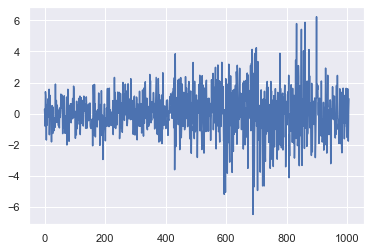

In [6]:
data2 = pd.read_csv("Al.csv")["Change %"]
data2 = pd.Series([float(d[:-1]) for d in data2][::-1])
data2 = data2[:-3]
plt.plot(data2)
from statsmodels.tsa.stattools import adfuller
adfuller(data2)

In [7]:
from statsmodels.tsa.arima.model import ARIMA
arim = ARIMA(data2, order = (2,0,3))
model = arim.fit()
model.summary()

c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1765.211
Date:                Mon, 19 Jun 2023   AIC                           3544.423
Time:                        21:27:32   BIC                           3578.826
Sample:                             0   HQIC                          3557.494
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0334      0.046      0.728      0.467      -0.056       0.123
ar.L1         -0.8770      0.017    -50.629      0.000      -0.911      -0.843
ar.L2         -0.9536      0.018    -54.094      0.000      -0.988      -0.919
ma.L1          0.9375      0.031     29.806      0.000       0.876       0.999
ma.L2          0.9872      0.032     30.631      0.000       0.924       1.050
ma.L3          0.0106      0.028      0.375      0.708      -0.045       0.066
sigma2         1.9486      0.066     29.367      0.000       1.819       2.079
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               130.14
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.34   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
vals = {}
for x in range(4):
    for y in range(4):
        arim = ARIMA(data2, order = (x+1 ,0, y+1))
        model = arim.fit()
        vals[str(x+1)+","+str(y+1)] = model.aic
vals

c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\michau

{'1,1': 3561.950379789001,
 '1,2': 3562.5727766250097,
 '1,3': 3562.8326810614053,
 '1,4': 3563.3432215035546,
 '2,1': 3562.3563580848536,
 '2,2': 3564.3985859812014,
 '2,3': 3544.422964392317,
 '2,4': 3559.0268647766015,
 '3,1': 3563.059997323992,
 '3,2': 3567.5987859131974,
 '3,3': 3546.513587377777,
 '3,4': 3550.6340114067507,
 '4,1': 3564.1126073847804,
 '4,2': 3558.657393641412,
 '4,3': 3548.421973038093,
 '4,4': 3547.4774844165486}

czyli '2,3': 3555.0774091512585

c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


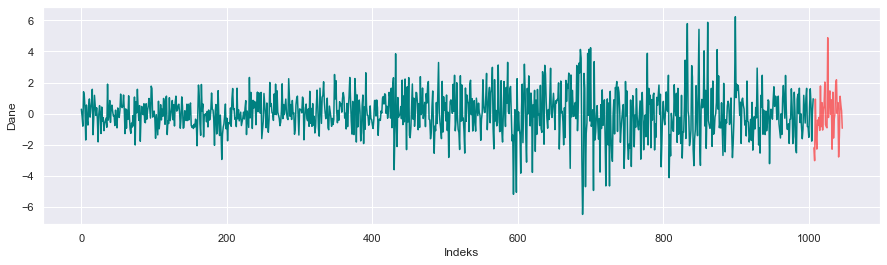

In [142]:
mod = sm.tsa.ARIMA(data2, order=(2, 0, 3), trend='c')
res = mod.fit()

# Simulate data starting at the end of the time series
sim = res.simulate(40, anchor='end', repetitions=1)

# Plot the data and simulations
fig, ax = plt.subplots(figsize=(15, 4))
plt.xlabel("Indeks")
plt.ylabel("Dane")
data2.plot(ax=ax, color = "teal")
plt.plot(sim, color="red", alpha = 0.5)
sim.plot(ax=ax, color='red', alpha=0.1, legend=False);

In [140]:
TT = np.zeros(500)

for i in range(500):
    mod = sm.tsa.ARIMA(data2, order=(2, 0, 3), trend='c')
    res = mod.fit()

    # Simulate data starting at the end of the time series
    sim = res.simulate(40, anchor='end', repetitions=1)
    TT[i] = convert_returns_to_values(data[-1], float(sim["y"][0].tail(1)))

c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\michau x\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Ma

KeyboardInterrupt: 

In [77]:
convert_returns_to_values(data[-1], float(sim["y"][0].tail(1)))

2255.4999609634624

In [89]:
np.mean(TT)

2239.396258505364

In [88]:
TT -= 9

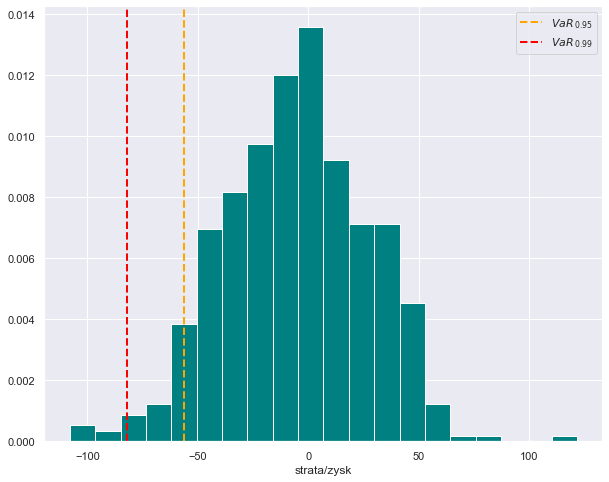

In [124]:
plt.figure(figsize=(10,8))
plt.xlabel("strata/zysk")
plt.hist(TT-2245, density = True, bins = 20, color = "teal")
plt.axvline(np.quantile(TT - 2245, 0.05), color = "orange", linestyle = "--", linewidth = 2, label = "$VaR_{\,0.95}$")
plt.axvline(np.quantile(TT - 2245, 0.01), color = "red", linestyle = "--", linewidth = 2,label = "$VaR_{\,0.99}$")
plt.legend()

In [143]:
np.quantile(TT-2245, 0.05)

-2245.0

In [14]:
def convert_returns_to_values(d_i, d):
    d_i_plus_1 = (1 + d/100) * d_i
    return d_i_plus_1

# Konwersja stopy zwrotu na wartość danych
d_i_plus_1 = [convert_returns_to_values(data[i], data2[i+1]) for i in range(len(data)-1) ]

d_i_plus_1[-1]

2256.456

--------